In [3]:
import autokeras as ak
import pandas as pd
from sklearn.model_selection import train_test_split

Using TensorFlow backend


In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Automated-Machine-Learning-with-Auto-Keras/main/boston.csv")
y = df.pop('MEDV')
X = df
train_data, test_data, train_targets, test_targets = train_test_split(X,y,test_size=0.2)

In [7]:
reg = ak.StructuredDataRegressor(
    max_trials=2,
    overwrite=True,
    metrics=['mae']
)

reg.fit(
    train_data.to_numpy(),
    train_targets.to_numpy(),
    epochs=50,
)

Trial 2 Complete [00h 00m 13s]
val_loss: 37.94564437866211

Best val_loss So Far: 22.436054229736328
Total elapsed time: 00h 00m 24s
Epoch 1/50
13/13 [==============================] - 1s 4ms/step - loss: 591.4279 - mae: 22.3760
Epoch 2/50
13/13 [==============================] - 0s 3ms/step - loss: 558.3362 - mae: 21.6016
Epoch 3/50
13/13 [==============================] - 0s 3ms/step - loss: 520.0410 - mae: 20.6571
Epoch 4/50
13/13 [==============================] - 0s 3ms/step - loss: 474.0163 - mae: 19.4787
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 419.6926 - mae: 18.0293
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 358.6977 - mae: 16.3614
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 294.2079 - mae: 14.5225
Epoch 8/50
13/13 [==============================] - 0s 3ms/step - loss: 230.9313 - mae: 12.5479
Epoch 9/50
13/13 [==============================] - 0s 3ms/step - loss: 173.6376 - mae: 10.6270
Epo

In [9]:
reg.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 5ms/step - loss: 16.5441 - mae: 2.4797


[16.544126510620117, 2.479726791381836]

In [11]:
keras_model = reg.export_model()
keras_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 multi_category_encoding (M  (None, 12)                0         
 ultiCategoryEncoding)                                           
                                                                 
 normalization (Normalizati  (None, 12)                25        
 on)                                                             
                                                                 
 dense (Dense)               (None, 32)                416       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

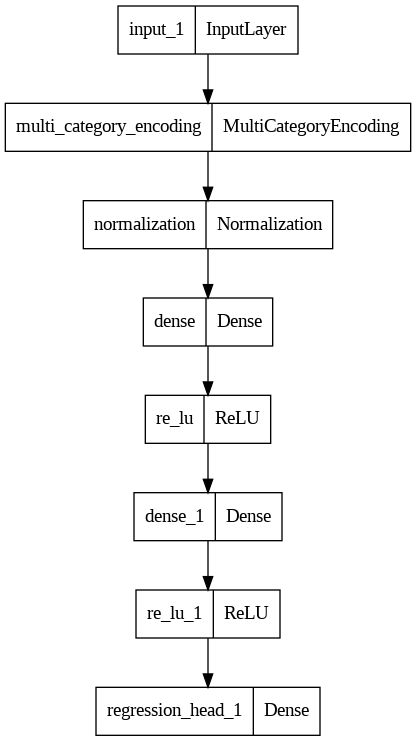

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(keras_model)